In [1]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_visualization as dv
from pathlib import Path
import pandas as pd    
import read_data_functions as rdf
import plot_functions as pf
from initializer import InitialThangs
import Statistics as st
import constants
import pingouin as pg
from scipy import stats
import matplotlib.image as mpimg
import matplotlib as mpl
import analysis_utilities as au
import helper_functions as hf
import matplotlib.transforms as transforms

plt.style.use("cashaback_dark")
# import viper as vp
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

In [2]:
from matplotlib.lines import Line2D

def legend(ax, labels, colors, ncol = 1,
            fontsize = 6, linewidth = None, 
            framealpha = 0, loc = "best", fontweight = "bold",
            columnspacing = 0, linestyle = None, lw = None, 
            ls = None, handlestyle="bar", markersize=None, handletextpad=None, 
            labelspacing=None, **kwargs):
    """
    Creates Custom colored legend
    Parameters
    **kwargs: Additional keyword arguents to be passed to pyplot.legend()
    
    Returns a legend object
    """
    
    if len(labels) != len(colors):
        raise RuntimeError("Number of Labels should match number of Colors.")
        
    if lw == None and linewidth == None:
        linewidth = 4
    elif lw != None and linewidth == None:
        linewidth = lw
        
    if ls == None and linestyle == None:
        linestyle = "-"
    elif ls != None and linestyle == None:
        linestyle = ls
        
    if not isinstance(linestyle,(list, np.ndarray)):
        linestyle = [linestyle]*len(colors)        
    
    if handletextpad is None:
        handletextpad = 0
    
    custom_handles = []            
    if handlestyle == "bar":
        for i,color in enumerate(colors):
            custom_handles.append(Line2D([0], [0], color=color, 
                                         lw=linewidth, ls = linestyle[i]))
    elif handlestyle in ["circle","o"]:
        for i,color in enumerate(colors):
            custom_handles.append(Line2D([], [], marker='o', markersize=markersize, 
                                         markerfacecolor=color, markeredgecolor=color, 
                                         ls="none", lw=linewidth))
    elif isinstance(handlestyle,list):
        for i,color in enumerate(colors):
            custom_handles.append(Line2D([], [], marker=handlestyle[i], markersize=markersize, 
                                         markerfacecolor=color, markeredgecolor=color, 
                                         ls="none", lw=linewidth))
            print(handlestyle[i])
            
    leg = ax.legend(custom_handles, labels, fontsize = fontsize,
             framealpha = framealpha, loc = loc, ncol = ncol, 
             columnspacing = columnspacing, handletextpad=handletextpad, 
             labelspacing=labelspacing, **kwargs)
    
    leg_text = leg.get_texts()
    for i, text in enumerate(leg_text):
        text.set_color(colors[i])
        text.set_weight(fontweight)
        
    return leg

In [3]:
EXPERIMENT = "Exp1"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
plt.rcParams["font.family"] = "DejaVu Sans"
wheel = dv.ColorWheel()

# Get path and save path 
DATA_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results")
SAVE_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\paper\figures")
it = InitialThangs(EXPERIMENT)

In [4]:
with open(constants.MODEL_INPUT_PATH / 'bootstrap_parameter_distribution.pkl','rb') as f:
    parameter_distribution = dill.load(f)    
#* Comparison Targets load
with open(constants.MODEL_INPUT_PATH / 'participant_mean_movement_onset_time.pkl','rb') as f:
    participant_mean_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_median_movement_onset_time.pkl','rb') as f:
    participant_median_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_sd_movement_onset_time.pkl','rb') as f:
    participant_sd_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_iqr_movement_onset_time.pkl','rb') as f:
    participant_iqr_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_wins.pkl','rb') as f:
    participant_wins = dill.load(f)  
participant_perc_wins = (participant_wins/it.num_trials)*100
with open(constants.MODEL_INPUT_PATH / 'participant_incorrects.pkl','rb') as f:
    participant_incorrects = dill.load(f)  
participant_perc_incorrects = (participant_incorrects/it.num_trials)*100

with open(constants.MODEL_INPUT_PATH / 'participant_indecisions.pkl','rb') as f:
    participant_indecisions = dill.load(f)  
participant_perc_indecisions = (participant_indecisions/it.num_trials)*100

with open(r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\participant_data\Exp1_stats_df.pkl', "rb") as f:
    stats_df = dill.load(f)
    
with open(DATA_PATH / "participant_data" / 'Exp1_trial_data_df.pkl', "rb") as f:
    trial_df = dill.load(f)
with open(DATA_PATH / "participant_data" / 'Exp1_summary_data_df.pkl', "rb") as f:
    summary_df = dill.load(f)
    

In [5]:
#* Get dataframe and create the stats inputs
# TODO LOAD IN THE DATAFRAME FROM The new df I just created

exp1_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_stats_df.pkl") 
exp1_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_anova_df.pkl") 
exp1_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_pvals_df.pkl") 
exp1_pvals_uncorrected_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_pvals_uncorrected_df.pkl") 
exp1_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_cles_df.pkl") 

exp2_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_anova_df.pkl") 
exp2_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_pvals_df.pkl") 
exp2_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_cles_df.pkl") 
exp2_pvals_df

,Metric,Collapsed,01,02,13,23
0,Reaction_Time_Median,NaN,0.0,0.024174,0.0,0.027363
1,Reaction_Time_Mean,NaN,0.0,0.004936,0.0,0.354558
2,Reaction_Time_SD,NaN,0.0,0.000011,0.0,0.000000
3,Reaction_Time_IQR,NaN,0.0,0.000015,0.0,0.000002


# Model Figures

In [6]:
def find_mse_loss(df, data):
    metrics = ["mean_movement_onset_time", "sd_movement_onset_time", 
                "indecisions","wins","incorrects"]
    
    for i,metric_name in enumerate(metrics):
        mse_losses_per_metric = []
        prediction_ser = df[metric_name]
        for index,row in prediction_ser.items():
            # TODO Need to figure out how to take the mean when I have 20,6 data points and 6 
            # print(data[i])
            # print(row)
            mse_loss = np.mean((data[i]-row)**2)
            mse_losses_per_metric.append(mse_loss)
        df[metric_name+"_mse_loss"] = mse_losses_per_metric
    return df

def find_aic_bic(df):
    metrics = ["mean_movement_onset_time", "sd_movement_onset_time", 
                "indecisions","wins","incorrects"]
    num_data_points = 20
    for metric_name in metrics:
        df[metric_name+'_bic'] = df['num_parameters']*np.log(num_data_points) + 2*np.log(df[metric_name+"_mse_loss"])
        df[metric_name+'_aic'] = 2*df['num_parameters'] + 2*np.log(df[metric_name+'_mse_loss'])
    return df

## Load Models

In [7]:
BOOTSTRAPPED_MODELS = True
if BOOTSTRAPPED_MODELS:
    p = "bootstrapped"
else:
    p = "warmstart"
    
path = constants.MODELS_PATH / f"{p}_models"
# model_names = ["Base","Optimal","Suboptimal_All"]#, "Suboptimal Partial"]
model_names = ["Base","Optimal","Suboptimal_Partial"]#, "Suboptimal Partial"] #! 07/03/24 I was using suboptimal all previously but I thought I was using partial
model_results = []
model_inputs = []
indices = [-1, -1, -1]
for i,model in enumerate(model_names):
    #* load model
    results_path = list(path.glob(f"{EXPERIMENT}_{model.lower()}_{p}_results*"))[indices[i]]
    inputs_path = list(path.glob(f"{EXPERIMENT}_{model.lower()}_{p}_inputs*"))[indices[i]]
    print(results_path)
    print(inputs_path)
    #* Get inputs df
    temp_inputs = pd.read_pickle(path / inputs_path)
    model_inputs.append(temp_inputs)
    
    #* Get results df
    temp_results = pd.read_pickle(path / results_path)
    
    #* Get number of parameters
    try:
        temp_results['num_parameters'] = 7 + temp_results["fit_parameters"].apply(len) # Add on number of parameters
    except KeyError:
        temp_results['num_parameters'] = 7
        
    #* Get mse loss for each row in df
    data = [participant_mean_movement_onset_time, participant_sd_movement_onset_time, 
            participant_perc_indecisions/100, participant_perc_wins/100, participant_perc_incorrects/100]
    temp_results = find_mse_loss(temp_results, data)
    
    #* Get AIC and BIC for each of the metrics
    temp_results = find_aic_bic(temp_results)
    model_results.append(temp_results)
    
    


    
#* Put model results into lists of dictionaries for plotting
col_names = ["indecisions", "wins", "incorrects",]
base_medians = {}
base_intervals = {}
optimal_medians = {}
optimal_intervals = {}
suboptimal_medians = {}
suboptimal_intervals = {}
for i,col_name in enumerate(col_names):
    base_arr = np.stack(model_results[0][col_name].to_numpy())
    optimal_arr = np.stack(model_results[1][col_name].to_numpy())
    suboptimal_arr = np.stack(model_results[2][col_name].to_numpy())
    base_medians.update({col_name:np.median(base_arr,axis=0)[[0,2,4,1,3,5]]})
    base_intervals.update({col_name:np.percentile(base_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]})
    optimal_medians.update({col_name:np.median(optimal_arr,axis=0)[[0,2,4,1,3,5]]})
    optimal_intervals.update({col_name:np.percentile(optimal_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]}) 
    suboptimal_medians.update({col_name:np.median(suboptimal_arr,axis=0)[[0,2,4,1,3,5]]})
    suboptimal_intervals.update({col_name:np.percentile(suboptimal_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]})
    
median_dicts = [base_medians, optimal_medians, suboptimal_medians]
interval_dicts = [base_intervals, optimal_intervals, suboptimal_intervals]
    
    

d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_base_bootstrapped_results_2024_07_18_06_39_59.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_base_bootstrapped_inputs_2024_07_18_06_39_59.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_optimal_bootstrapped_results_2024_07_18_06_39_59.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_optimal_bootstrapped_inputs_2024_07_18_06_39_59.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_suboptimal_partial_bootstrapped_results_2024_07_22_07_06_37.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_

# Paper Figures

o
s
d


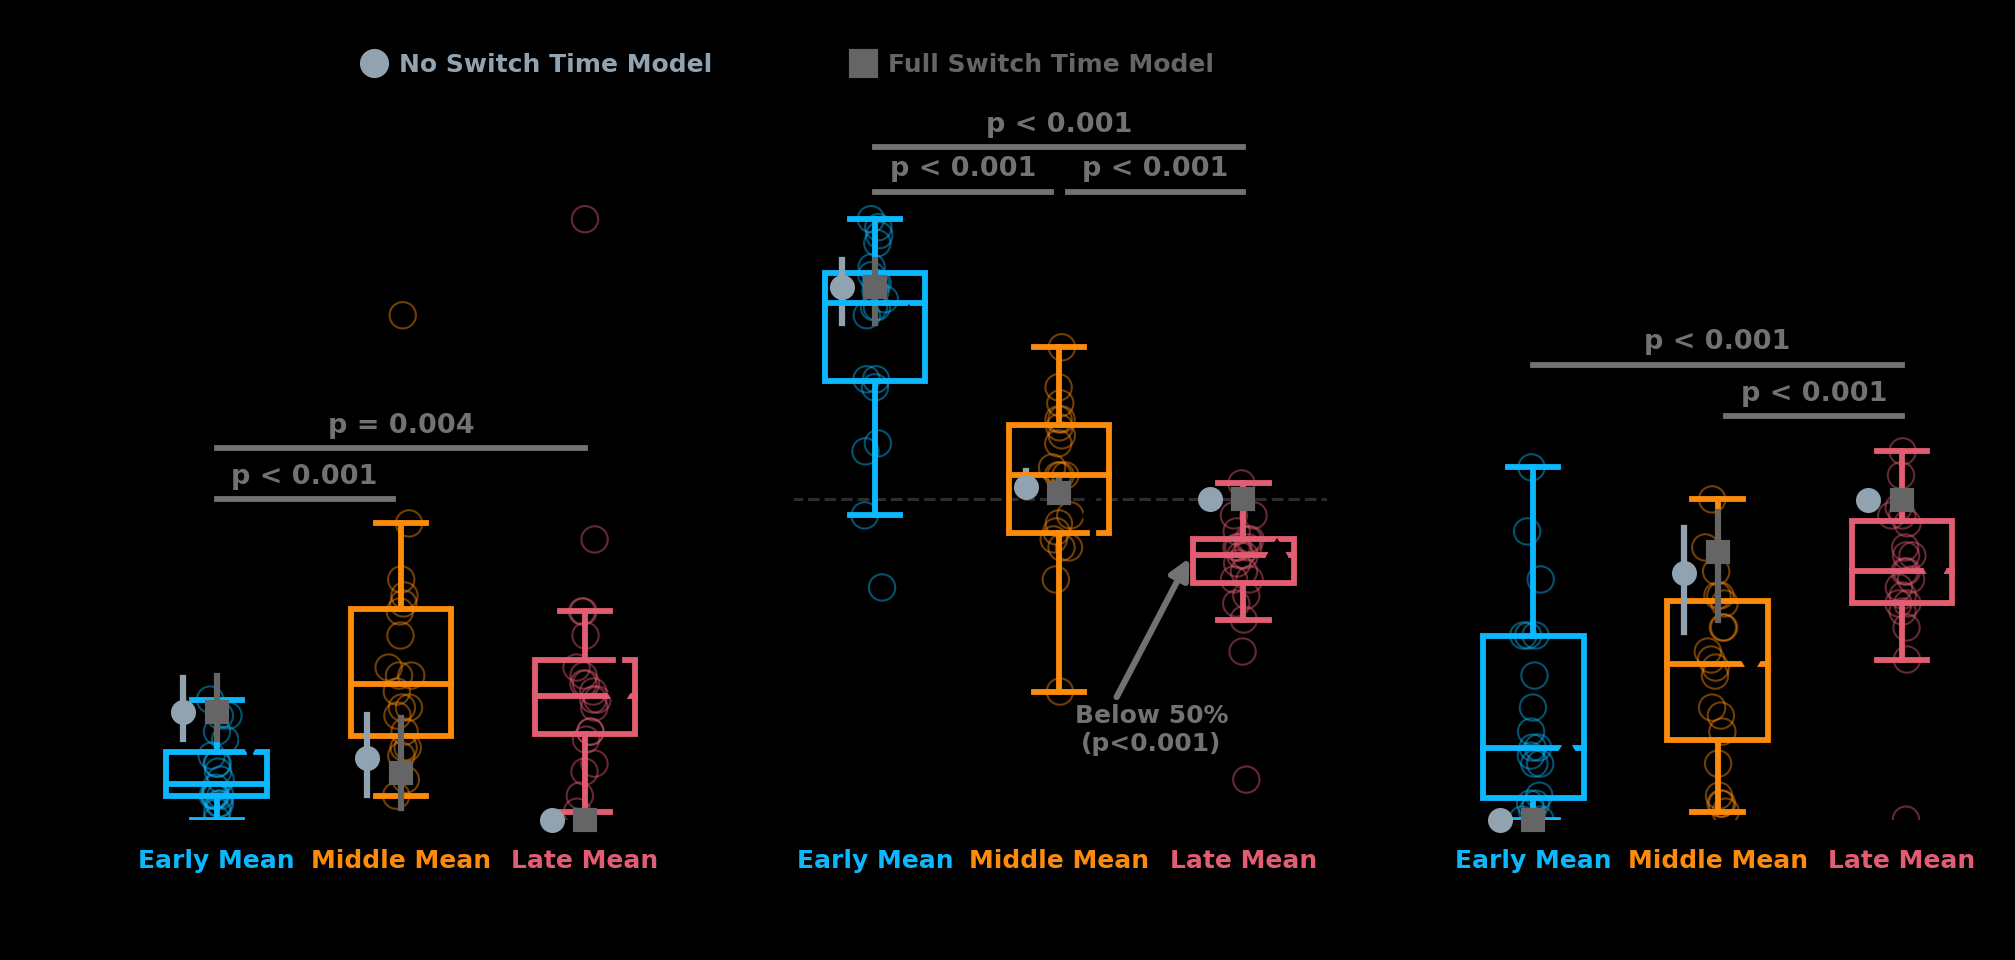

In [8]:

w, h = 6.5,3
bw = 0.6  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(-0.2, 2, num=3)
legend_fontsize = 6.5
ticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 15

ylabelpad = -2

metrics = np.array(
    [
        participant_perc_indecisions,
        participant_perc_wins,
        participant_perc_incorrects,
    ]
)[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want

figure_pvals = [
    # exp1_pvals_df.query("Metric == 'Mean_Movement_Onset_Time'"),
    # exp1_pvals_df.query("Metric == 'SD_Movement_Onset_Time'"),
    exp1_pvals_df.query("Metric == 'Indecisions'"),
    exp1_pvals_df.query("Metric == 'Wins'"),
    exp1_pvals_df.query("Metric == 'Incorrects'"), 
]
figure_cles = [
    # exp1_cles_df.query("Metric == 'Mean_Movement_Onset_Time'"),
    # exp1_cles_df.query("Metric == 'SD_Movement_Onset_Time'"),
    exp1_cles_df.query("Metric == 'Indecisions'"),
    exp1_cles_df.query("Metric == 'Wins'"),
    exp1_cles_df.query("Metric == 'Incorrects'"), 
]

stat_ypos = [ 
    [52,52,63],
    [100,100,111],
    [65,65,76],
]
stat_heights = [1.5, 1.5, 1.5]

ylocs = ([np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Indecisions (%)",
    "Wins (%)",
    "Incorrects (%)",
]
ylims = [(0, 100)] * 3
marker_styles = ["o","s","d"]
legend_locs = (0.58, 0.86)

#* Create Figure
mosaic = [
    ["leg","leg","leg"],
    ["a","b","c"],
    ["a","b","c"],
    ]
fig = pf.NewFigure(mosaic=mosaic, dpi=300, figsize=(w, h), wspace=0, hspace=0, 
                   height_ratios=[0.1,1,1])
axs = list(fig.axes.values())

# * Looping axes for each metric
i = -1
for letter,ax in fig.axes.items():
    if letter=="leg":
        continue
    i+=1
    # Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4,
            box_width = bw,
            include_mean =False,
            noise_scale=0.03,
            jitter_data=True,
            data_alpha = 0.45,
        )
        # Plot models
        for k, (model_medians, model_intervals) in enumerate(zip(median_dicts, interval_dicts)):
            if k == 0:
                shift = -bw / 3
            elif k == 2:
                shift = +bw / 3
            else:
                shift=0
            pf.plot_boostrapped_model_results(
                ax,
                xlocs[j] + shift,
                y=model_medians[col_names[i]][j],
                percentiles=model_intervals[col_names[i]][:, j],
                horizontal_lw=0,
                markersize=5,
                color=constants.model_colors[k],
                markerstyle=marker_styles[k],
            )
    if i == 1:
        ax.axhline(50, color=wheel.lighten_color(wheel.dark_grey,1.5), ls='--', zorder=-100, lw=0.75)
        
    ax.set_ylim(ylims[i])
    # ax.set_xlim(min(xlocs) - 0.22, max(xlocs) + 0.22)
    ax.set_xticks(xlocs, labels=constants.xticklabels_only_mean, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel("Agent Movement Onset", fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpad)
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means[:3],ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # remove the ticks 

#* Plot Stats
pf.plot_stats_v2(
                fig.axes['a'],
                pvals=exp1_pvals_df.query("Metric == 'Indecisions'"),
                cles = exp1_cles_df.query("Metric == 'Indecisions'"),
                combos = ['02','04'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
                xlocs = [
                    [xlocs[0], xlocs[1]-0.05], 
                    [xlocs[0], xlocs[2]],
                ],
                ypos=[50,58],
                stacked=True,
                show_effectsize=False,
                lw = 1.4, 
                h = 1.5,
                fontsize=6.5,
                shorten_length=True,
                color = wheel.lighten_color(wheel.dark_grey,1.0),
            )
pf.plot_stats_v2(
                fig.axes['b'],
                pvals=exp1_pvals_df.query("Metric == 'Wins'"),
                cles = exp1_cles_df.query("Metric == 'Wins'"),
                combos = ['02','24','04'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
                xlocs = [
                    [xlocs[0], xlocs[1]-0.05], 
                    [xlocs[1]+0.05, xlocs[2]],
                    [xlocs[0], xlocs[2]],
                ],
                ypos= [98,98,105],
                stacked=True,
                show_effectsize=False,
                lw = 1.4, 
                h = 1.5,
                fontsize=6.5,
                shorten_length=True,
                color = wheel.lighten_color(wheel.dark_grey,1.0),
            )
pf.plot_stats_v2(
                fig.axes['c'],
                pvals=exp1_pvals_df.query("Metric == 'Incorrects'"),
                cles = exp1_cles_df.query("Metric == 'Incorrects'"),
                combos = ['24','04'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
                xlocs = [
                    [xlocs[1]+0.05, xlocs[2]],
                    [xlocs[0], xlocs[2]],
                ],
                ypos=[63,71],
                stacked=True,
                show_effectsize=False,
                lw = 1.4, 
                h = 1.5,
                fontsize=6.5,
                shorten_length=True,
                color = wheel.lighten_color(wheel.dark_grey,1.0),
            )
#* Below 50%
# fig.axes['b'].plot([xlocs[2]-0.35,xlocs[2]-0.35],[49.5,37],color=wheel.dark_grey)
fig.axes['b'].text(xlocs[2]-0.55, 14, "Below 50%\n(p<0.001)", fontsize=6, 
                   color=wheel.dark_grey, fontweight="bold", ha='center', va='center') 
trans = transforms.blended_transform_factory(
    fig.axes['b'].transAxes, 
    fig.axes['b'].transData
)
arrow = mpl.patches.FancyArrowPatch((0.60,18), (0.75,42),arrowstyle="-|>",mutation_scale=10,lw=1.5,
                                    transform=trans, 
                                    color=wheel.dark_grey, zorder=90)
fig.axes['b'].add_patch(arrow)

#* Legend
leg=legend(fig.axes['leg'], labels=constants.model_names, colors=constants.model_colors, 
              loc="center", ncol=3, fontsize=6, columnspacing=5, 
              handlestyle=['o','s','d'],labelspacing=3.75, handletextpad=0)
fig.axes['leg'].axis("off")
#* Add Letters
# fig.add_all_letters(verticalshift=0.35, horizontalshift=-0.6)
plt.draw()
fig.add_letter(fig.axes['a'],-0.18, 1.09)
fig.add_letter(fig.axes['b'],-0.18, 1.09)
fig.add_letter(fig.axes['c'],-0.18, 1.09)

# fig.adjust_position(fig.axes['a'], (0,-0.13))a
# fig.adjust_position(fig.axes['b'], (0,-0.13/2))
shift = 0.08
for ax_label in ["a","b","c"]:
    # if ax_label in ["b","d"]:
    fig.adjust_position(fig.axes[ax_label], (-0.02, 0)) # Shift the b and d plots to the left a bit
    fig.adjust_size(fig.axes[ax_label], (abs(shift), 0)) # Make the figures all a bit wider

# plt.show()
fig.savefig(r"D:\OneDrive - University of Delaware - o365\Desktop\phd-proposal\paper\figures\aim1_data_panel_with_models_proposal.png")
# fig.savefig(SAVE_PATH / "exp1_data_panel_with_models_proposal.png",transparent=True)

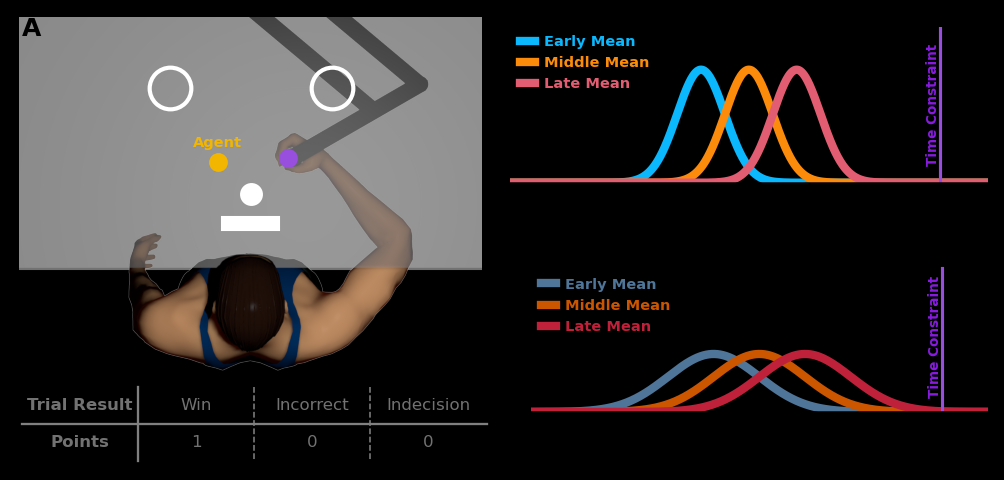

In [9]:
#* Set distribution values
if True:
    timesteps = np.arange(0,2000,1)
    mu1,mu2,mu3 = 1000,1100,1200
    sd1,sd2 = 50,100

    dist1 = stats.norm.pdf(timesteps,mu1,sd1) 
    dist2 = stats.norm.pdf(timesteps,mu2,sd1) 
    dist3 = stats.norm.pdf(timesteps,mu3,sd1) 
    dist4 = stats.norm.pdf(timesteps,mu1,sd2) 
    dist5 = stats.norm.pdf(timesteps,mu2,sd2) 
    dist6 = stats.norm.pdf(timesteps,mu3,sd2)
    dists1 = [dist1, dist2, dist3]
    dists2 = [dist4, dist5, dist6]
    alldists = [dists1,dists2]

#* Create Figure
fig = pf.NewFigure('ab;ab;ad;cd', figsize=(6.5,3), hspace=0,wspace=0)
start_radius = 0.2
xrad = start_radius/6.5
yrad = start_radius/3
#* Kinarm Guy, circles, stimulus, player
fig.axes['a'].imshow(mpimg.imread(SAVE_PATH / "kinarm_guy_clean.png"), aspect='equal')
rectw = 0.125
fig.axes['a'].add_patch(mpl.patches.Rectangle((0,0.29), width=1, height=1-0.29, color=wheel.dark_grey, zorder=-1,transform=fig.axes['a'].transAxes))
fig.axes['a'].add_patch(mpl.patches.Rectangle((0.5-rectw/2,0.4), width=rectw, height=0.035, color=wheel.white, zorder=99, transform=fig.axes['a'].transAxes))
fig.axes['a'].plot(0.5,0.5,"wo", markersize=10, transform = fig.axes['a'].transAxes)
fig.axes['a'].plot(0.325,0.8,"wo",markerfacecolor="none", markersize=20,mew=2, transform = fig.axes['a'].transAxes)
fig.axes['a'].plot(0.675,0.8,"wo",markerfacecolor="none", markersize=20,mew=2, transform = fig.axes['a'].transAxes)
fig.axes['a'].plot(1.82,2.05,"o", color=constants.player_color, markersize=8, transform = fig.axmain.transData)
fig.axes['a'].plot(1.35,2.02,"o", color=constants.stimulus_color, markersize=8, transform = fig.axmain.transData)
fig.axes['a'].text(1.35,2.1,"Agent",color=constants.stimulus_color, fontweight="bold", fontsize=7, transform=fig.axmain.transData,
                   ha='center',va='bottom')
#* Table
text = np.array([['Trial Result', 'Win', "Incorrect", 'Indecision'],
                 ['Points',       "1",       "0",         "0"]])
fontweights = np.full_like(text, ["light"])
fontweights[:,0] = "bold"
table = pf.PrettyTable(
    fig.axes['c'], 
    text,
    fontsize=8, fontweight=fontweights,
    inner_vertical_ls=['-',"--","--"],
    inner_horizontal_ls=["-"], 
    inner_horizontal_lw=1.1,
    inner_vertical_lw=[1.1,0.75,0.75],
    border_lw=0, 
    fontcolor=wheel.dark_grey,
)

#* Plot Distributions
ax1 = fig.axes['b']
ax2 = fig.axes['d']
colors = [constants.xticklabel_colors_means[:3], constants.xticklabel_colors_means[3:]] 
vline_y = [1,0.9]
text_y = [0.5,0.47]
for i,ax in enumerate([ax1,ax2]):
    for j in range(3):
        ax.plot(alldists[i][j],color=colors[i][j],lw=4)
    ax.axvline(1500, ymax=vline_y[i], color=wheel.purple)
    # the x coords of this transformation are data, and the y coord are axes
    trans = transforms.blended_transform_factory(
        ax.transData, ax.transAxes)
    ax.text(s="Time Constraint", x=1470, y=text_y[i], rotation=90, transform = trans, fontsize=6.5, va='center', fontweight="bold", color=wheel.plum)
    ax.set_xlim(600,1600)
    ax.set_xticks(np.arange(600,1601,150))
    ax.set_xticklabels(np.arange(600,1601,150),fontsize=6.5, c='black')
    # ax.set_title(titles[i])
    # ax.set_ylabel("Probability Density", fontsize=7, labelpad=-1)
    ax.spines['left'].set_visible(False)
    ax.set_yticklabels([])
    ax.tick_params(axis="y", which='both', length=0)
    ax.set_xlabel('Agent Movement Onset Time (ms)',fontsize = 7)
    ax.set_ylim(0,0.011)

#* Legends
if True:
    legend_labels1 = [
            "Early Mean",
            "Middle Mean",
            "Late Mean",
        ]
    legend_labels2 = [
        "Early Mean",
        "Middle Mean",
        "Late Mean",
    ]
    legend_labels = [legend_labels1, legend_labels2]
    legend_locs = [(0.01,0.55), (0.01, 0.45)]
    columnspacing = [1.6]*2 
    for i,ax in enumerate([ax1,ax2]):
        leg = dv.legend(ax,labels=legend_labels[i], colors=colors[i], ncols=1, loc=legend_locs[i],
        handlelength=1.0, columnspacing=columnspacing[i], lw=4, fontsize=7, fontweight='bold',
        handletextpad=0.6)
        leg.set_in_layout(False)
        
ax1.set_title("Low Variance", fontsize=9, y=0.875)
ax2.set_title("High Variance", fontsize=9, y=0.8)

#* Add letters and adjust sizes 
fig.fig.get_layout_engine().set(w_pad=1/72, 
                                h_pad=1 / 72, 
                                hspace=0,
                                wspace=0)
adjust = 0.75
fig.adjust_size(fig.axes['a'],(adjust,adjust+0.08))
fig.adjust_position(fig.axes['a'],(-adjust+0.2,-adjust+0.115))

fig.add_letter(fig.axes['a'], 
               x=0.006, y=1, 
               letter='A', zorder=101)
fig.add_letter(fig.axes['b'], x=-0.05, y=1.075, letter="C")
fig.adjust_position(fig.axes['b'], (-0.14 ,0))
fig.adjust_size(fig.axes['b'], (0.14,0))

fig.add_letter(fig.axes['c'], x=-0.01, y=1.3, letter="B")
fig.adjust_position(fig.axes['c'], (-0.175,-0.325))
fig.adjust_size(fig.axes['c'], (0.05,0.2))
fig.axes['c'].axis("off")
fig.axes['a'].axis('off')

# plt.show()
fig.savefig(r"D:\OneDrive - University of Delaware - o365\Desktop\phd-proposal\paper\figures\aim1_exp1_experimental_design.png")